In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
star = pd.read_csv ('https://github.com/YBIFoundation/Dataset/raw/main/Stars.csv')
star.head()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M


In [4]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [5]:
star.describe()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [6]:
star.columns

Index(['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude (Mv)', 'Star type', 'Star category', 'Star color',
       'Spectral Class'],
      dtype='object')

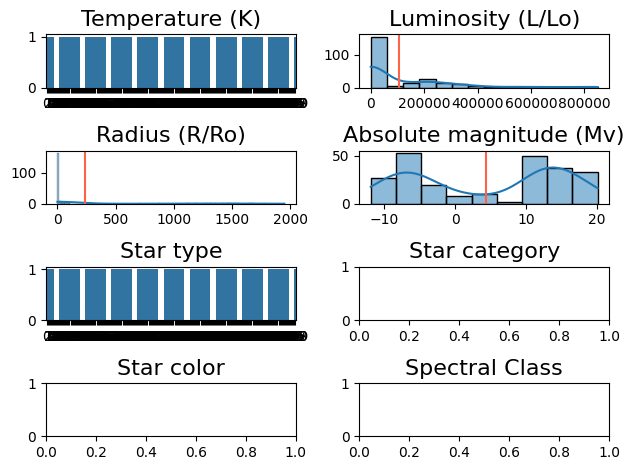

In [15]:
df = pd.read_csv( 'https://github.com/YBIFoundation/Dataset/raw/main/Stars.csv' )


rows = 4 ; cols = int(df.shape[ 1 ] / rows)
for index, (colname, serie) in enumerate(df.items()):
    plt.subplot(rows, cols, index + 1 )
    if pd.api.types.is_float_dtype(serie) is True :
        sns.histplot(serie, kde= True)
        plt.axvline(np.mean(serie), color= 'tomato' )
    elif pd.api.types.is_integer_dtype(serie) is True :
        sns.countplot(serie)
    plt.title(colname, fontsize= 16 )
    plt.xlabel( '' );plt.ylabel( '' );plt.tight_layout()

In [ ]:
star[['Spectral Class']].value_counts()

Spectral Class
M                 111
B                  46
O                  40
A                  19
F                  17
K                   6
G                   1
Name: count, dtype: int64

In [ ]:
star.replace({'Spectral Class':{'M':0, 'A':1, 'B':1, 'F':1, 'O':1, 'K':1, 'G':1 }}, inplace=True)

C:\Users\vliza\AppData\Local\Temp\ipykernel_27972\1778226697.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  star.replace({'Spectral Class':{'M':0, 'A':1, 'B':1, 'F':1, 'O':1, 'K':1, 'G':1 }}, inplace=True)


In [ ]:
star[['Star type']].value_counts()

Star type
0            40
1            40
2            40
3            40
4            40
5            40
Name: count, dtype: int64

In [ ]:
star.replace({'Star color':{ 'Red':0, 'Yellow':1, 'White':2, 'White ': 2, 'Blue ':3, 'Blue':3 }}, inplace=True)

In [ ]:
star[['Star color']].value_counts()

Star color        
0                     112
3                      56
Blue-white             26
Blue White             10
yellow-white            8
2                       7
Blue white              3
white                   3
Yellowish White         3
Whitish                 2
yellowish               2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Blue-White              1
Blue white              1
Orange-Red              1
Name: count, dtype: int64

In [ ]:
y = star['Spectral Class']
X = star[['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude (Mv)']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 200)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

d:\U\Python\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[18,  0],
       [ 2, 28]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.93      0.97        30

    accuracy                           0.96        48
   macro avg       0.95      0.97      0.96        48
weighted avg       0.96      0.96      0.96        48

